# 4.9 Intro to Data Visualization with Pythonm

#### This script includes the following points:

#### 1. Import data and Libraries

#### 2. Creating Bar Charts

##### 2a. Sorting

##### 2b. Adding Color to Charts

#### 3. Exporting Charts

#### 4. Creating Histograms

#### 5. Creating Scatterplots

##### 5a. Marking Values as Missing

#### 6. Creating Line Charts

##### 6a. Sampling Data

### 1. Import data and libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import dataframe

path = r'C:\Users\jenci\Documents\Data Analytics\Python Fundamentals for Data Analysts\04-2024 Instacart Basket Analysis'
df_ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_4.pkl'))

In [3]:
# Check shape

df_ords_prods_merge.shape

(32434212, 24)

### 2. Creating Bar Charts

<Axes: xlabel='orders_day_of_week'>

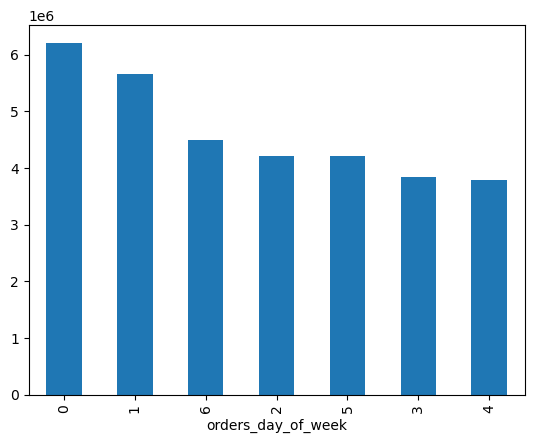

In [4]:
# Create a bar chart

df_ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

#### 2a. Sorting

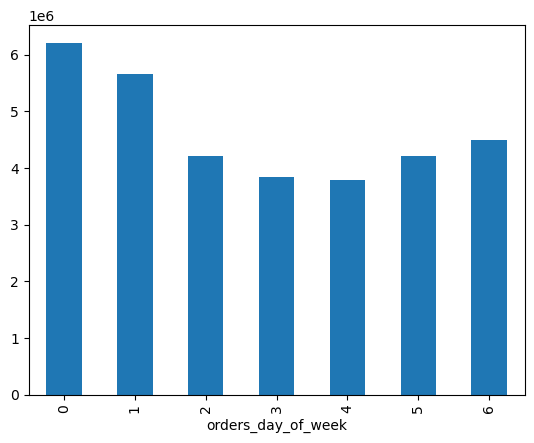

In [5]:
# Create a bar chart and sor the bars by index order

bar = df_ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [6]:
# Check frequencies for orders_day_of_week

df_ords_prods_merge['orders_day_of_week'].value_counts()

orders_day_of_week
0    6209632
1    5665830
6    4500246
2    4217766
5    4209449
3    3844096
4    3787193
Name: count, dtype: int64

In [7]:
# Sort frequencies for orders_day_of_week by index order

df_ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6209632
1    5665830
2    4217766
3    3844096
4    3787193
5    4209449
6    4500246
Name: count, dtype: int64

#### 2b. Adding Color to Charts

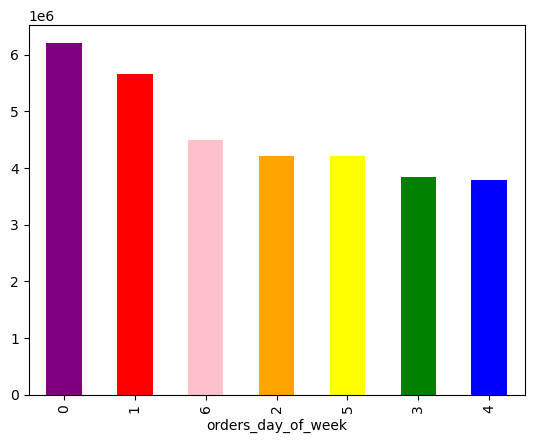

In [8]:
# Add color to bar chart

bar = df_ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

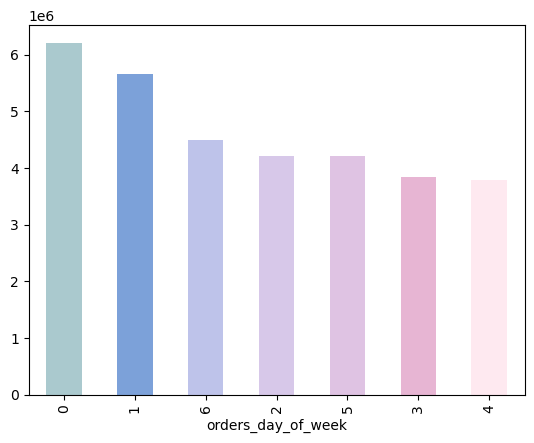

In [9]:
# Adding color using hexadecimal colors
bar_2 = df_ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color = ['#AAC9CE', '#7CA1D9', '#BEC3EA', '#D7C8E9', '#DFC3E3', '#E7B5D3', '#FEE9F0'])

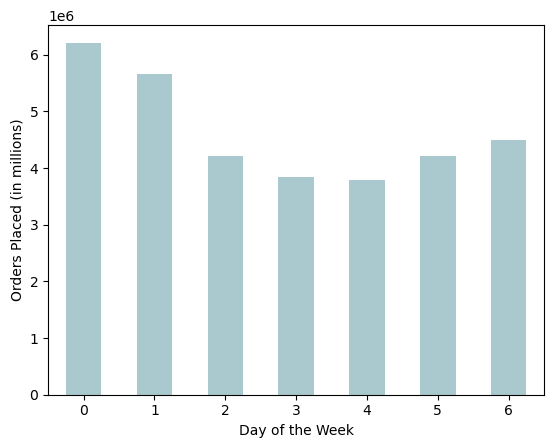

In [10]:
# Create bar chart (not sorting)
df_copy = df_ords_prods_merge.copy()
odow_value_counts = df_copy['orders_day_of_week'].value_counts(sort=False)
odow_value_counts = odow_value_counts.sort_index()
bar_3 = odow_value_counts.plot.bar(color=['#AAC9CE'])
plt.ylabel('Orders Placed (in millions)')
plt.xticks(rotation=0)
plt.xlabel('Day of the Week')
plt.show()

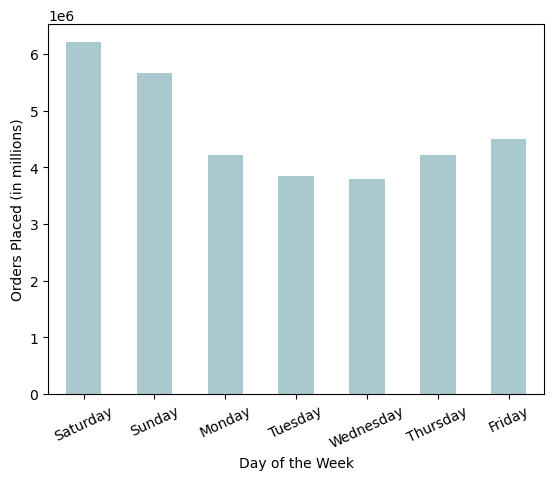

In [11]:
# Create bar chart (with day names)

day_labels = {0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'}
odow_value_counts = df_copy['orders_day_of_week'].map(day_labels).value_counts()
desired_order = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
odow_value_counts.index = pd.Categorical(odow_value_counts.index, categories=desired_order, ordered=True)
odow_value_counts = odow_value_counts.sort_index()

bar_4 = odow_value_counts.plot.bar(color = ['#AAC9CE'])
plt.ylabel('Orders Placed (in millions)')
plt.xlabel('Day of the Week')
plt.xticks(rotation=25)
plt.show()

In [12]:
df_ords_prods_merge.head(1)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_order_price,spending_flag,median_order_freq,order_freq_flag
0,2539329,1,1,2,8,7.0,196.0,1.0,0.0,Soda,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer


### 3. Exporting Charts

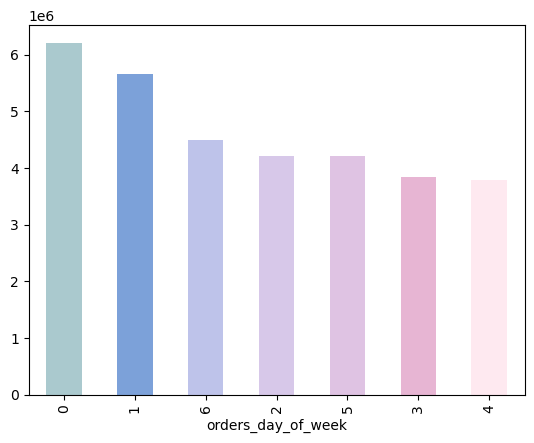

In [13]:
# Save the bar chart in Jupyter's memory

bar_2 = df_ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color = ['#AAC9CE', '#7CA1D9', '#BEC3EA', '#D7C8E9', '#DFC3E3', '#E7B5D3', '#FEE9F0'])

In [14]:
# Export the bar chart using savefig()

bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow_og.png'))

In [15]:
bar_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow_numbers.png'))

In [16]:
bar_4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow_day_labels.png'))

### 4. Creating Histograms

<Axes: ylabel='Frequency'>

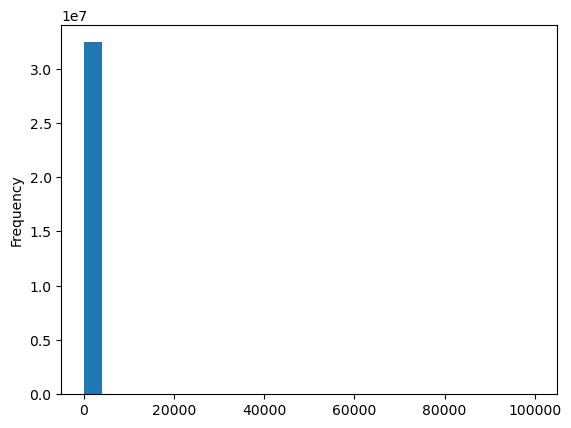

In [17]:
# Create a histogram

df_ords_prods_merge['prices'].plot.hist(bins = 25)

In [18]:
# Conduct data consistency check

df_ords_prods_merge['prices'].describe()

count    3.243421e+07
mean     1.198114e+01
std      4.954311e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [19]:
df_ords_prods_merge['prices'].mean()

11.98114392296625

In [20]:
df_ords_prods_merge['prices'].median()

7.4

In [21]:
df_ords_prods_merge['prices'].max()

99999.0

### 5. Creating a Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

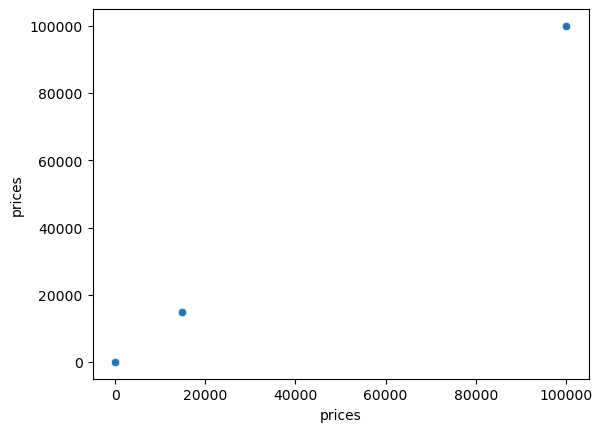

In [22]:
# Create a scatterplot

sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_merge)

In [23]:
# Conduct exploratory check
pd.set_option('display.max_columns', None)

In [24]:
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_order_price,spending_flag,median_order_freq,order_freq_flag
10030345,912404,17,12,2,14,5.0,21553.0,5.0,0.0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553.0,3.0,1.0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553.0,6.0,0.0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High spender,11.5,Regular customer
10030348,892534,135,3,0,8,12.0,21553.0,3.0,1.0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,11.5,Regular customer
10030349,229704,342,8,1,19,30.0,21553.0,9.0,0.0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,20.0,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29193268,2249946,204099,29,0,8,4.0,33664.0,1.0,0.0,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29193269,2363282,204099,31,0,9,2.0,33664.0,1.0,1.0,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29193270,3181945,204395,13,3,15,8.0,33664.0,25.0,0.0,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,Regularly busy,Slowest days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29193271,2486215,205227,7,3,20,4.0,33664.0,8.0,0.0,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,Regularly busy,Slowest days,Average orders,12,Regular customer,1178.381871,High spender,7.0,Frequent customer


#### 5a. Marking Values as Missing

In [25]:
# Mark these obvervations containing outlier prices with missing values

df_ords_prods_merge.loc[df_ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [26]:
# Check output

df_ords_prods_merge['prices'].max()

25.0

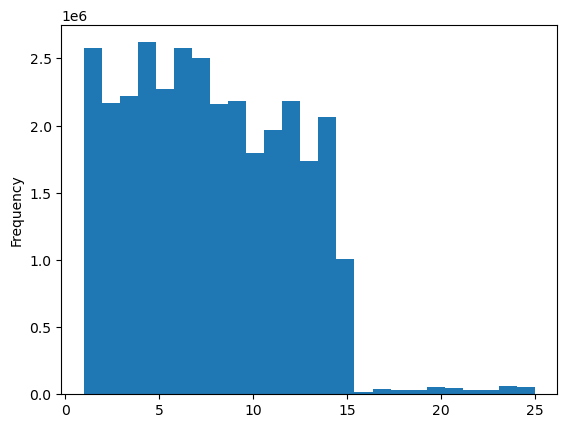

In [27]:
# Re-create historgram after data cleaning

histogram_2 = df_ords_prods_merge['prices'].plot.hist(bins = 25)

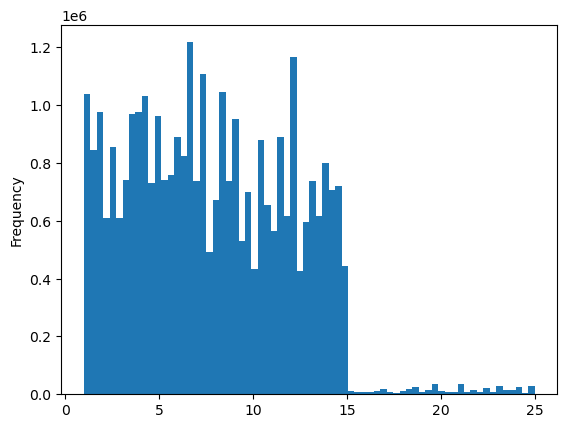

In [28]:
# Make a histogram with increased granularity

histogram_3 = df_ords_prods_merge['prices'].plot.hist(bins = 70)

### 6. Creating Line Charts

In [29]:
# 'Create subset' - This method does not work for reducing computer power, as this does not accurately represent the dataset

df = df_ords_prods_merge[:2000000]

#### 6a. Sampling Data

In [30]:
# Create a sample - set the seed and create random numbers the length of df_ords_prods_merge

np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_merge)) <= 0.7

In [31]:
# Check list

dev

array([False,  True, False, ..., False,  True,  True])

In [32]:
# Store 70% of the sample in the dataframe big

big = df_ords_prods_merge[dev]

In [33]:
# Store 30 of the sample in the dataframe small

small = df_ords_prods_merge[~dev]

In [34]:
# Check samples

len(df_ords_prods_merge)

32434212

In [35]:
len(big) + len(small)

32434212

In [36]:
# Create new dataframe that reduces the sample to only contain orders_day_of_week and prices to speed up processing

df_2 = small [['orders_day_of_week','prices']]

C:\Users\jenci\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jenci\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


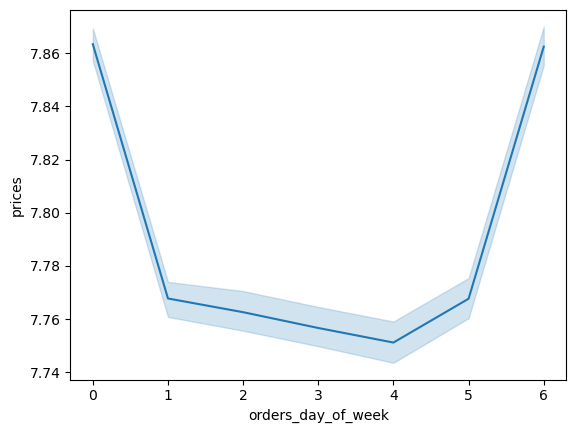

In [37]:
# Create lie chart

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')